<a href="https://colab.research.google.com/github/abhiruchipatilbhagat/Spotify-Clone/blob/main/MAGIC_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample  # If oversampling is involved
from sklearn.model_selection import train_test_split

Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [2]:
cols = ["fLength", "fWidth", "fSize", "fCone1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fCone1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [4]:
df["class"] = (df["class"] == "g").astype(int)

just converting g and h to 0 and 1

In [5]:
df.head()

,fLength,fWidth,fSize,fCone1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


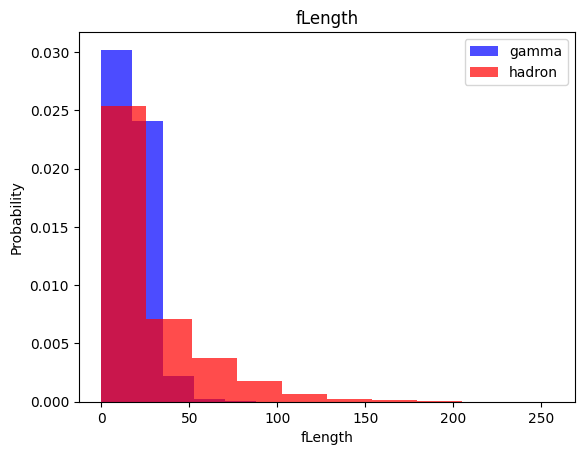

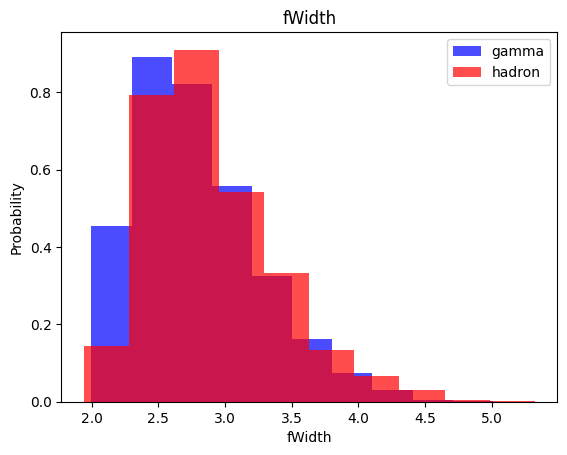

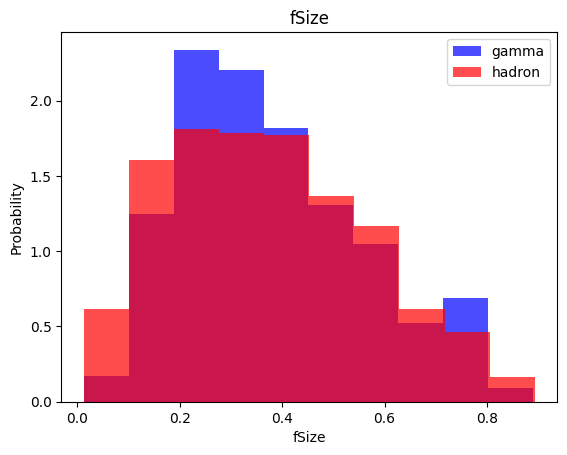

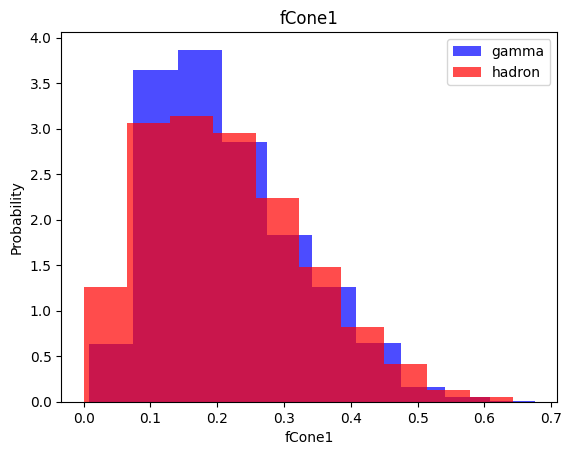

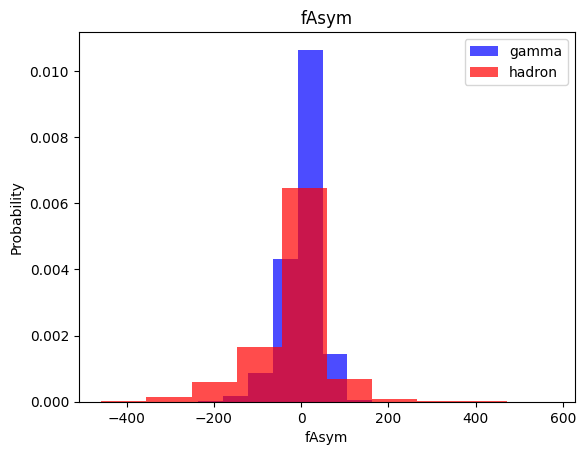

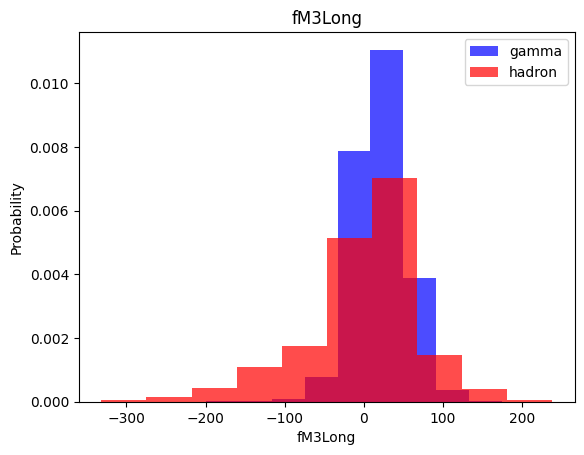

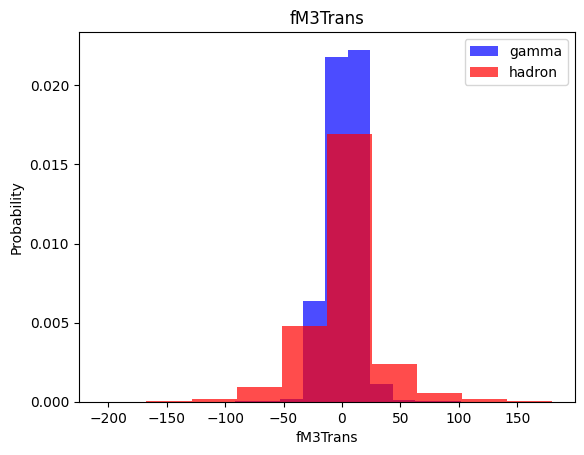

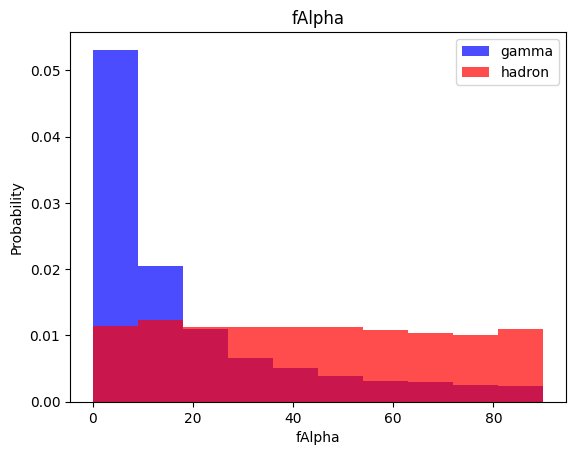

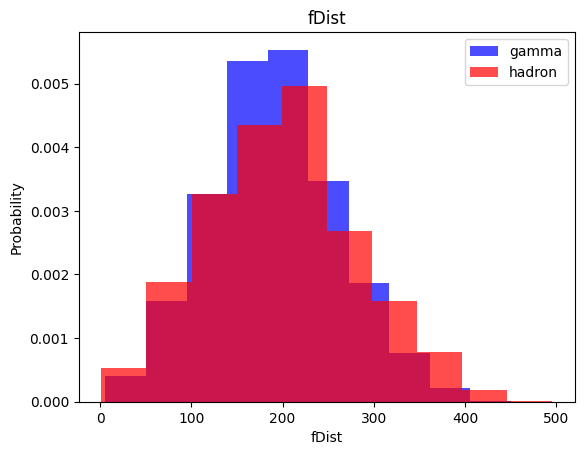

In [6]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color="blue", label="gamma", alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color="red", label="hadron", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


train, validation, testing

The error you're encountering suggests that there is an issue with the indexing of your DataFrame when attempting to split it into training, validation, and test sets. The sample(frac=1) method is shuffling the rows of the DataFrame, and then you're trying to split it based on certain indices.

The problem might be that the original indices of the DataFrame are not continuous, causing the KeyError when trying to access index 0. To fix this, you can reset the index of the DataFrame before splitting it. Here's an updated version of your code:

python
Copy code
import numpy as np
import pandas as pd

# Assuming df is your DataFrame
df = df.reset_index(drop=True)  # Resetting the index to make it continuous

train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
By resetting the index with reset_index(drop=True), you create a new DataFrame with a continuous index starting from 0. This should resolve the KeyError issue during the split.

In [7]:
df = df.reset_index(drop=True)

In [8]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [9]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

x is 2D but y is 1D => reshape it

In [10]:
print(len(train[train["class"]==1]))  #gamma
print(len(train[train["class"]==1]))  #hadrons

7415
7415


In [11]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [12]:
len(y_train)

14830

In [13]:
sum(y_train == 1)

7415

In [14]:
sum(y_train == 0)

7415

kNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [16]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
y_pred = knn_model.predict(X_test)

In [18]:
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [19]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1373
           1       0.85      0.85      0.85      2431

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [23]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.45      0.55      1373
           1       0.74      0.90      0.81      2431

    accuracy                           0.74      3804
   macro avg       0.73      0.67      0.68      3804
weighted avg       0.73      0.74      0.72      3804



Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [26]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1373
           1       0.83      0.81      0.82      2431

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



In [27]:
from sklearn.svm import SVC

In [28]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [29]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1373
           1       0.89      0.89      0.89      2431

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



Neural Net


In [44]:
import tensorflow as tf

In [56]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


In [47]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [58]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu', input_shape=(9,)),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

nn_model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [59]:
history = nn_model.fit(
    X_train, y_train, epochs = 100, batch_size=32, validation_split=0.2
)

Epoch 1/100
371/371 [==============================] - 2s 3ms/step - loss: 0.4396 - accuracy: 0.8042 - val_loss: 0.4870 - val_accuracy: 0.7650
Epoch 2/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3673 - accuracy: 0.8447 - val_loss: 0.5150 - val_accuracy: 0.7569
Epoch 3/100
371/371 [==============================] - 1s 4ms/step - loss: 0.3525 - accuracy: 0.8526 - val_loss: 0.4475 - val_accuracy: 0.7859
Epoch 4/100
371/371 [==============================] - 1s 4ms/step - loss: 0.3448 - accuracy: 0.8552 - val_loss: 0.6223 - val_accuracy: 0.6881
Epoch 5/100
371/371 [==============================] - 1s 4ms/step - loss: 0.3399 - accuracy: 0.8578 - val_loss: 0.4935 - val_accuracy: 0.7610
Epoch 6/100
371/371 [==============================] - 1s 4ms/step - loss: 0.3339 - accuracy: 0.8597 - val_loss: 0.5670 - val_accuracy: 0.7107
Epoch 7/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3305 - accuracy: 0.8618 - val_loss: 0.5532 - val_accuracy: 0.7320

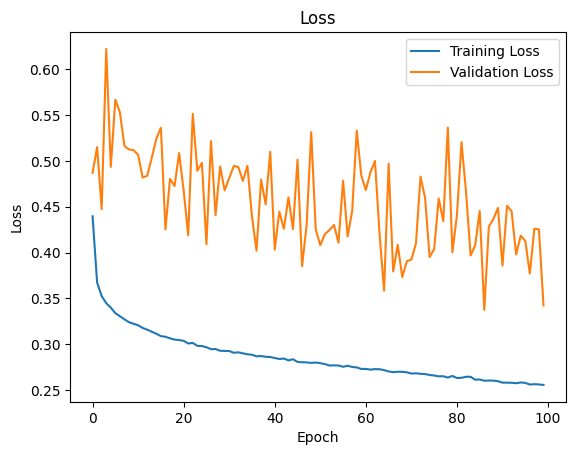

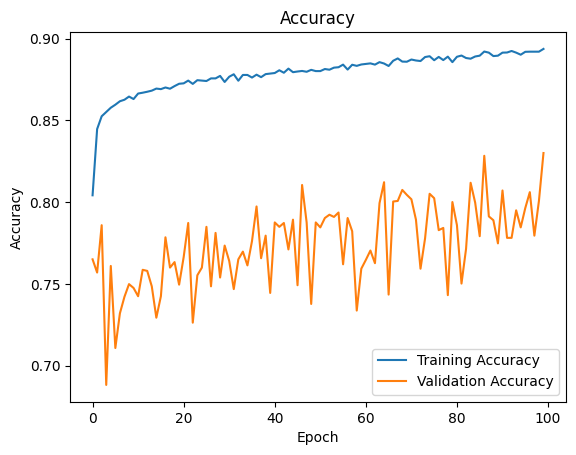

In [60]:
plot_loss(history)
plot_accuracy(history)